# Import

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# IRIS DataSet

In [ ]:

iris_dataset = load_iris()
iris_dataset.keys()

In [31]:
X = iris_dataset.data
y = iris_dataset.target
X.shape, y.shape

((150, 4), (150,))

In [32]:
np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [35]:
np.corrcoef(X, rowvar=False)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

Standaradize data

In [37]:
mu,std = np.mean(X, axis=0) ,np.std(X, axis=0)
X = (X - mu) / std

Covariance Matrix

In [ ]:
(X.T @ X)/X.shape[0] # covariance matrix same as corelation coeffecient matrix

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

# MNIST DataSet

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X_mnist, y_mnist = mnist["data"], mnist["target"]
X_mnist.shape, y_mnist.shape

((70000, 784), (70000,))

In [5]:
X_train_mnist = X_mnist[:60000]
y_train_mnist = y_mnist[:60000]
X_test_mnist = X_mnist[60000:]
y_test_mnist = y_mnist[60000:]

In [6]:
X_train_mnist.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


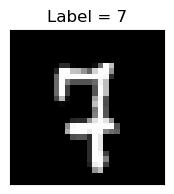

In [97]:
image_id = np.random.randint(X_train_mnist.shape[0])
_ = plt.figure(figsize=(2,2))
_ = plt.imshow(np.array(X_train_mnist.iloc[image_id]).reshape(28,28), cmap='gray')
_ = plt.title(f'Label = {y_train_mnist[image_id]}')
_ = plt.grid(False)
_ = plt.xticks([])
_ = plt.yticks([])

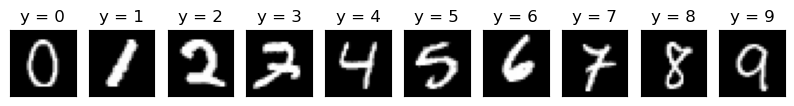

In [96]:
_ = plt.figure(figsize=(10,1))
for i in range(10):
    _ = plt.subplot(1,10,i+1)
    idx = np.random.choice(y_train_mnist[y_train_mnist == str(i)].index)
    _ = plt.imshow(np.array(X_train_mnist.iloc[idx]).reshape(28,28), cmap='gray')
    _ = plt.title(f'y = {i}')
    _ = plt.grid(False)
    _ = plt.xticks([])
    _ = plt.yticks([])

# PCA

## General way

((70000, 784), (70000,))

Targeted Accuracy = 90.00%


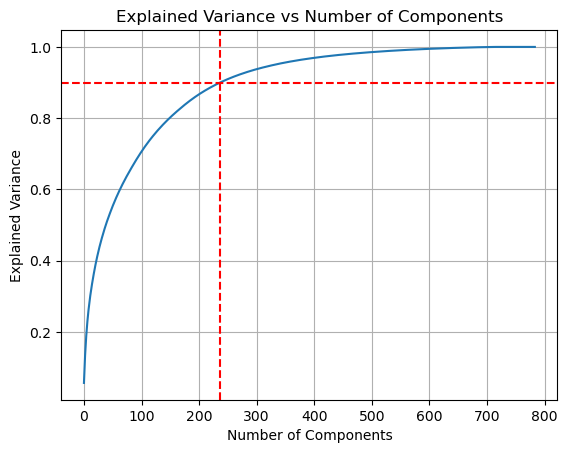

--> For 238 components explained variance of 90.05% can be achieved
Explained Variance = 90.05%
Projected shape :(70000, 238)
Reconstructed shape :(70000, 784)
Reconstruction Error : 0.09


In [269]:
X_mnist_values = X_mnist.values.astype(np.float64)
y_mnist_values = y_mnist.values
X_mnist_values.shape, y_mnist_values.shape

## 1. Standardize the data
# mu = np.mean(X_mnist_values, axis=0)
# std = np.std(X_mnist_values, axis=0) 
# std[std == 0] = 1
# X_mnist_values = (X_mnist_values - mu)/std
# X_mnist_covar = (X_mnist_values.T @ X_mnist_values)/X_mnist_values.shape[0]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_mnist_values = scaler.fit_transform(X_mnist_values)
X_mnist_covar = (X_mnist_values.T @ X_mnist_values)/X_mnist_values.shape[0]

required_accuracy = 0.90
print(f'Targeted Accuracy = {required_accuracy *100:.2f}%')

# 2. Compute the eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(X_mnist_covar)
k_components = X_mnist_covar.shape[0]
rev_sort_mask = np.argsort(eig_vals)[::-1]
cum_sum_explained_variance = np.cumsum(eig_vals[rev_sort_mask])/np.sum(eig_vals)

_ = plt.plot(cum_sum_explained_variance)
_ = plt.grid(True)
_ = plt.xlabel('Number of Components')
_ = plt.ylabel('Explained Variance')
_ = plt.title('Explained Variance vs Number of Components')
_ = plt.axhline(required_accuracy, color='r', linestyle='--')
_ = plt.axvline(np.argmax(cum_sum_explained_variance >= required_accuracy), color='r', linestyle='--')
_ = plt.show()

k_components = np.argmax(cum_sum_explained_variance >= required_accuracy) + 1
explained_variance = cum_sum_explained_variance[k_components-1]

print(f'--> For {k_components} components explained variance of {explained_variance*100:.2f}% can be achieved')

top_eigs = eig_vals[rev_sort_mask[:k_components]]
top_comps = eig_vecs[:, rev_sort_mask[:k_components]]
explained_variance = np.sum(top_eigs)/np.sum(eig_vals) 
print(f'Explained Variance = {explained_variance*100:.2f}%')

## 3. Project the data
X_mnist_proj = X_mnist_values @ top_comps
print(f'Projected shape :{X_mnist_proj.shape}')

## 4. Reconstruct the data
X_mnist_reconstruct = X_mnist_proj @ top_comps.T
print(f'Reconstructed shape :{X_mnist_reconstruct.shape}')

## 5. Perform the reconstruction error
reconstruction_error = np.mean(np.square(X_mnist_values - X_mnist_reconstruct))
print(f'Reconstruction Error : {reconstruction_error:.2f}')

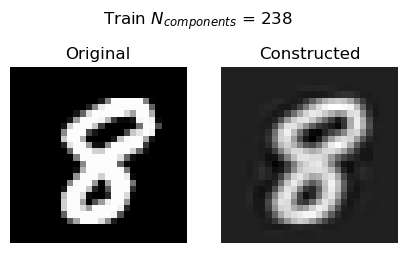

In [282]:
def plot_sample_compare(images_flat,reconstructed, n_components = None, Test_or_Train = None, shape = (28,28)):
	img = np.random.choice(images_flat.shape[0])
	fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
	axes[0].imshow(images_flat[img].flatten().reshape(shape) ,cmap='gray')
	axes[0].set_title('Original')
	axes[0].axis('off')
	axes[1].imshow(reconstructed[img].flatten().reshape(shape), cmap='gray')
	axes[1].set_title('Constructed')
	axes[1].axis('off')
	plt.axis('off')
	if n_components:
		fig.suptitle( str(Test_or_Train) + ' $N_{components}$ = ' + str(n_components))
plot_sample_compare(X_mnist_values *std + mu, X_mnist_reconstruct * std + mu, k_components, 'Train')

## using builtins

In [285]:
from sklearn.decomposition import PCA
pca = PCA(n_components=k_components)
X_mnist_proj = pca.fit_transform(X_mnist_values)
X_mnist_reconstruct = pca.inverse_transform(X_mnist_proj)
print(f'{pca.explained_variance_ratio_.sum()} == {explained_variance}')

0.9757747344768912 == 0.9004517647360487


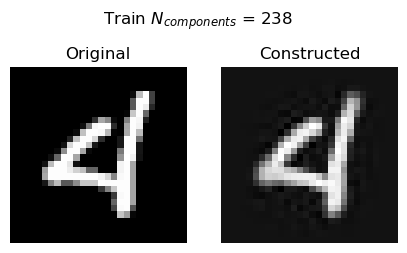

In [286]:
plot_sample_compare(X_mnist_values, X_mnist_reconstruct * std + mu, k_components, 'Train')

# t-SNE

## General way

In [ ]:
# -

## using builtins

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_mnist_2d = tsne.fit_transform(X_train_mnist)
# time taken = 3 mins 

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 't-SNE of MNIST Training Data')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

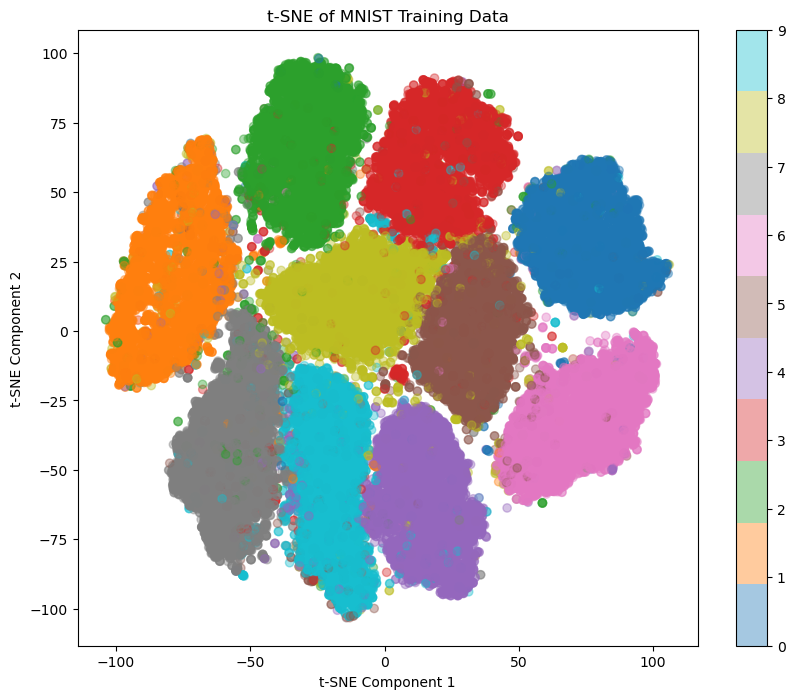

In [287]:
# Plot the result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_mnist_2d[:, 0], X_train_mnist_2d[:, 1], c=y_train_mnist.astype(int), cmap='tab10', alpha=0.4)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE of MNIST Training Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

c:\Users\myalla\anaconda3\envs\iisc\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 't-SNE of MNIST Training Data')

Text(0.5, 0, 't-SNE Component 1')

Text(0, 0.5, 't-SNE Component 2')

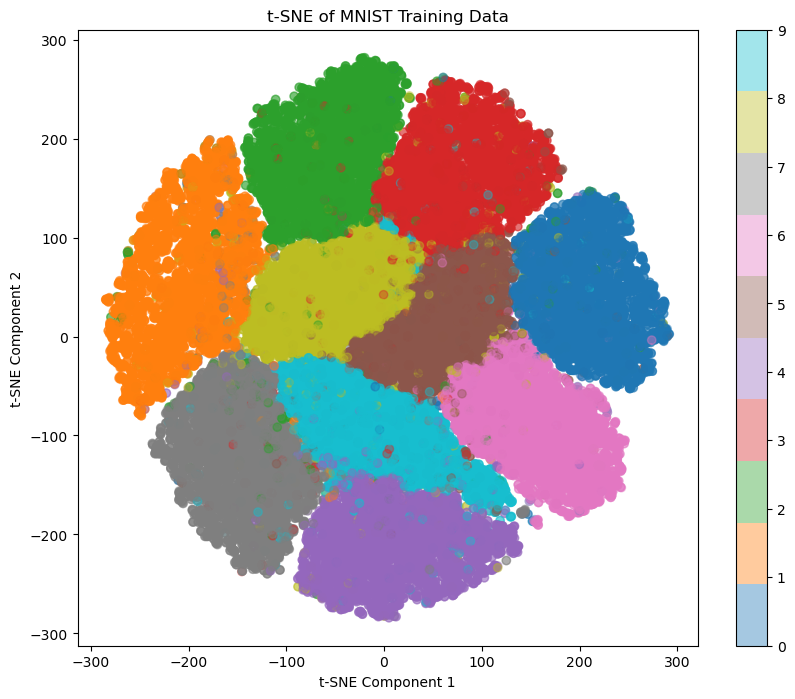

In [288]:
tsne = TSNE(n_components=2, perplexity=5, max_iter=5000, random_state=42)
X_train_mnist_2d = tsne.fit_transform(X_train_mnist)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_mnist_2d[:, 0], X_train_mnist_2d[:, 1], c=y_train_mnist.astype(int), cmap='tab10', alpha=0.4)
plt.colorbar(scatter, ticks=range(10))
plt.title('t-SNE of MNIST Training Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()